## Internship Task: A Mini Project on BigMart Product Outlet Sales Analysis and Prediction

## Problem Statement 

## Generating the Hypothesis

## Importing Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn
%matplotlib inline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

## Expanding Width of Notebook For Better View

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

## Set Max Rows and Columns Display for More Details

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the Data

In [5]:
# Loading the dataset
df = pd.read_csv('./Train.csv')

## Basic Data Exploration

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Checking the dimesion of the data
df.shape

(8523, 12)

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'], dtype='object')

In [9]:
# Info about the data and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Data Analysis

In [10]:
# count the total missing values in each column
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Univariate Analysis Plotting Numerical Values

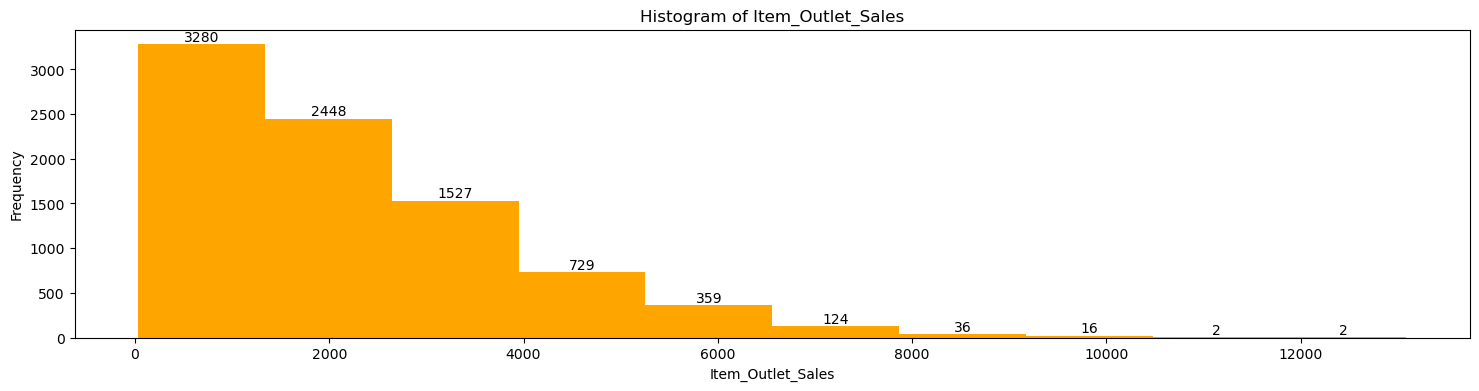

In [11]:
# Plotting the graph for Dependant variable or for Target variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Outlet_Sales"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Outlet_Sales")
plt.show()

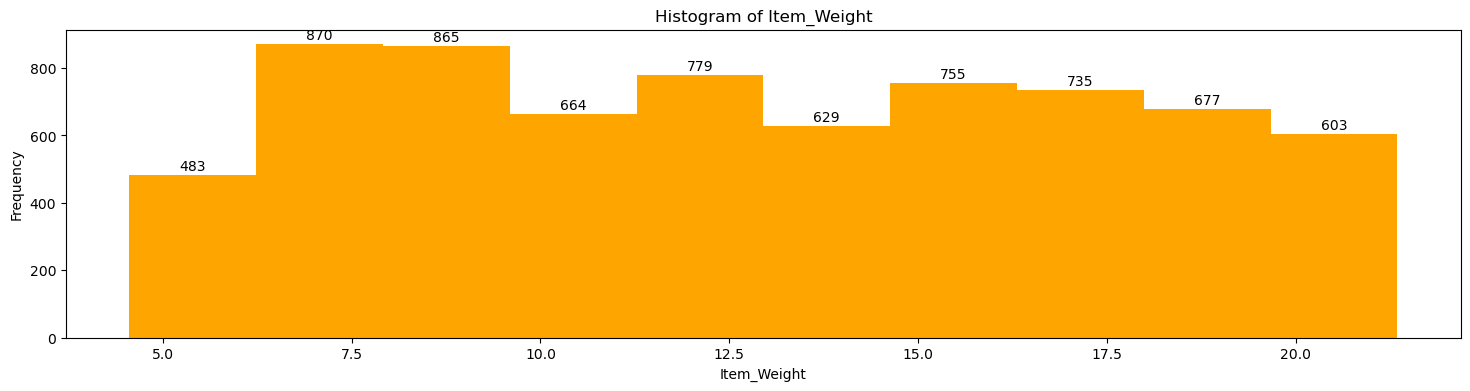

In [12]:
# Plotting Graphs for numerical Variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Weight"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Weight")
plt.show()

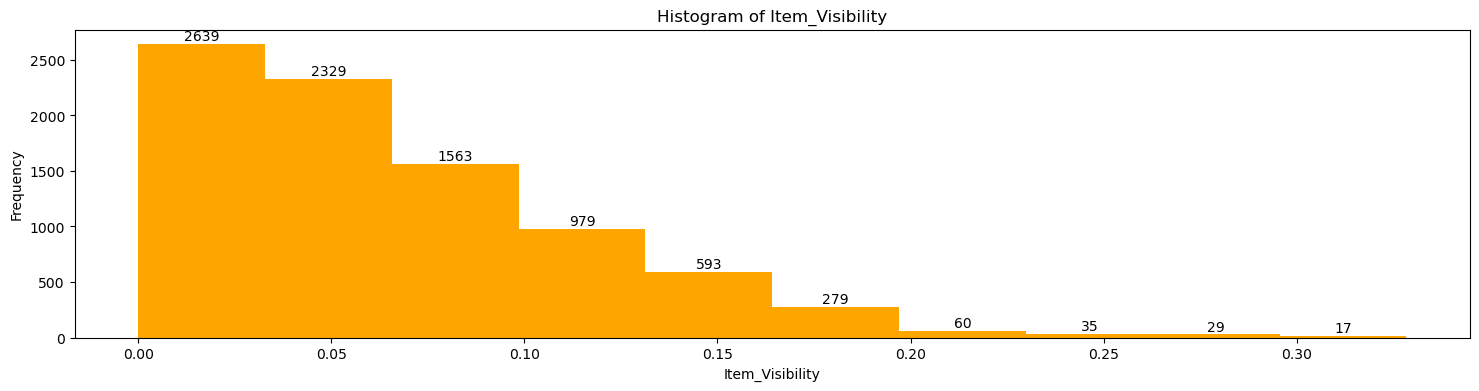

In [13]:
# Plotting Graphs for numerical Variable

fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Visibility"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Visibility")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Visibility")
plt.show()

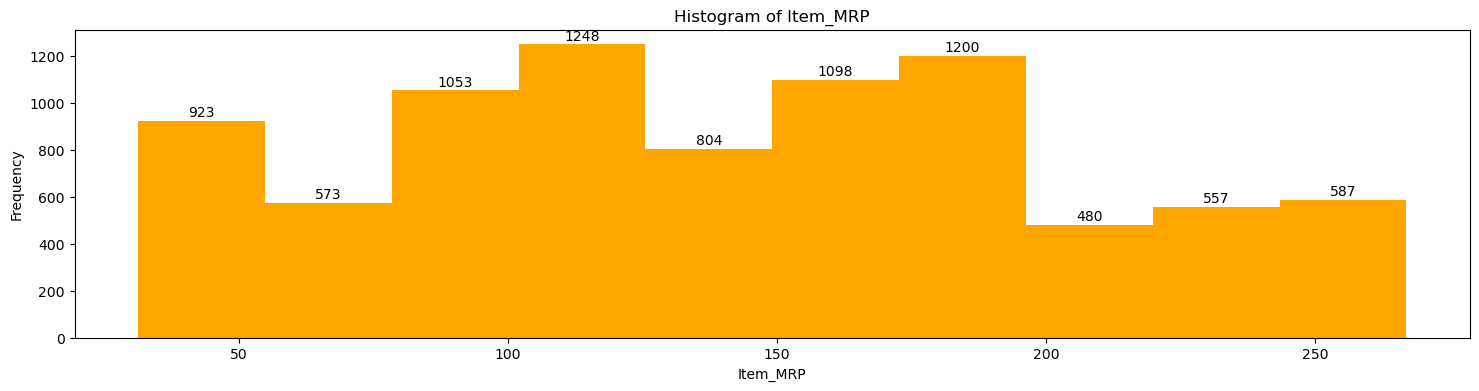

In [14]:
# Plotting Graphs for numerical Variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_MRP column
n, bins, patches = plt.hist(df["Item_MRP"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha = 'center', va = 'bottom')

plt.xlabel("Item_MRP")
plt.ylabel("Frequency")
plt.title("Histogram of Item_MRP")
plt.show()

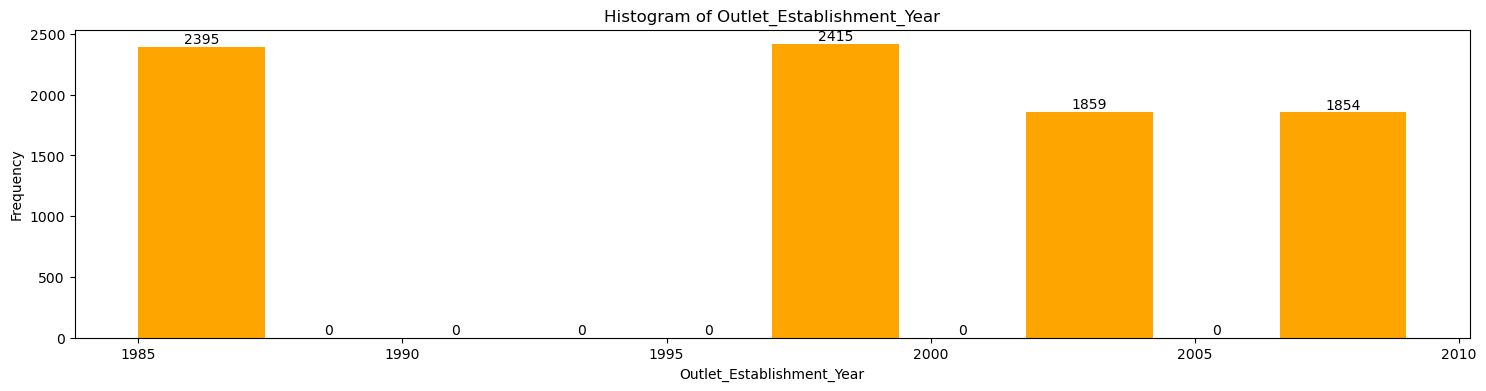

In [15]:
# Plotting Graphs for numerical Variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_MRP column
n, bins, patches = plt.hist(df["Outlet_Establishment_Year"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Frequency")
plt.title("Histogram of Outlet_Establishment_Year")
plt.show()

## Plotting Categorical Variables

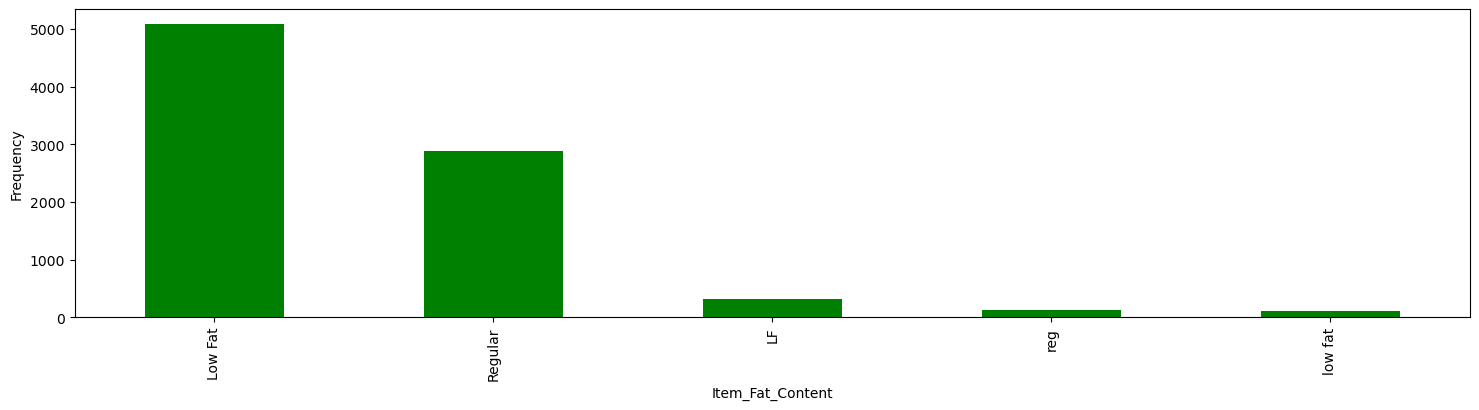

In [16]:
# Plotting the Graph for Categorical values
fig = plt.figure(figsize = (18,4))
# dfmain["Item_Fat_Content"].plot.hist()
df['Item_Fat_Content'].value_counts().plot(kind='bar', color = 'green')
plt.xlabel("Item_Fat_Content")
plt.ylabel('Frequency')
plt.show()

In [17]:
# Let's change the same values LF, reg to Low Fat and Regular, low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

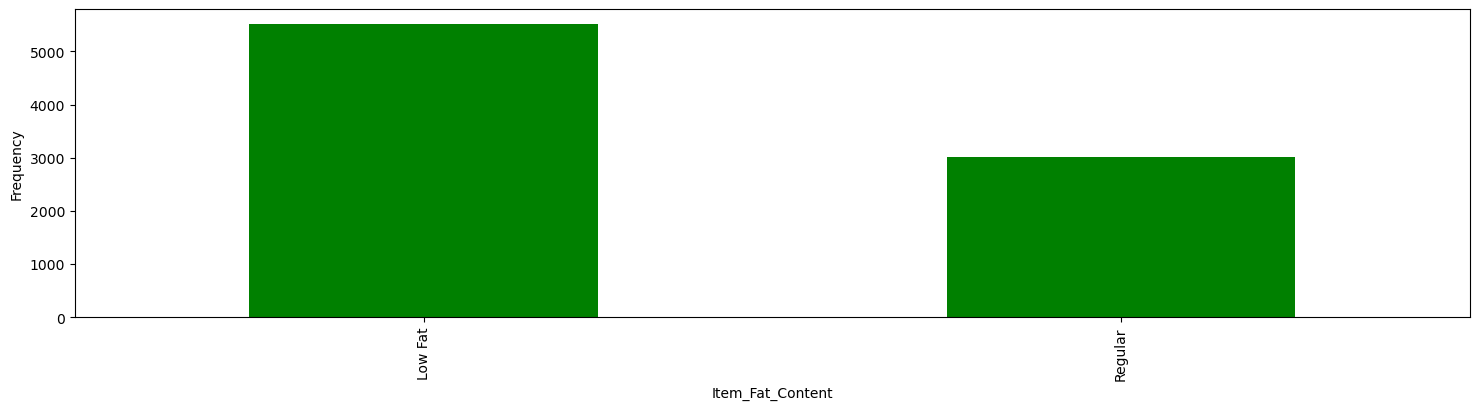

In [18]:
# Values replaced, plotting the graph below for verification
fig = plt.figure(figsize = (18,4))
# dfmain["Item_Fat_Content"].plot.hist()
df['Item_Fat_Content'].value_counts().plot(kind='bar', color = 'green')
plt.xlabel("Item_Fat_Content")
plt.ylabel('Frequency')
plt.show()

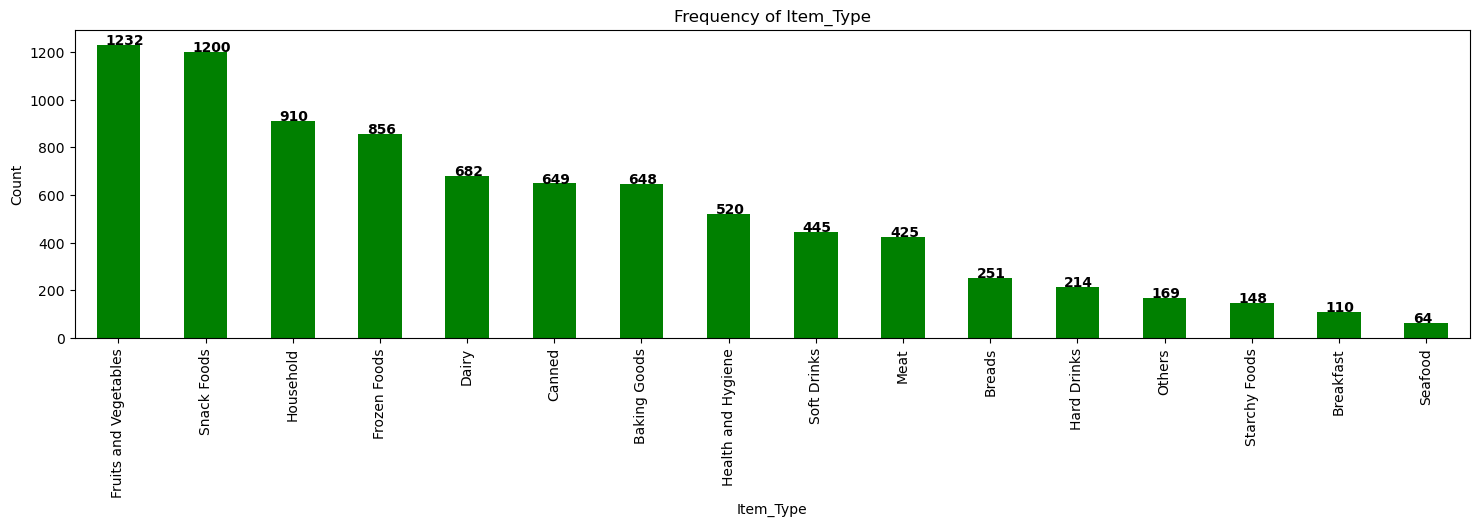

In [19]:
# Plotting the ar Graph for Categorical values
fig = plt.figure(figsize = (18,4))
count = df['Item_Type'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.title('Frequency of Item_Type')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()
None

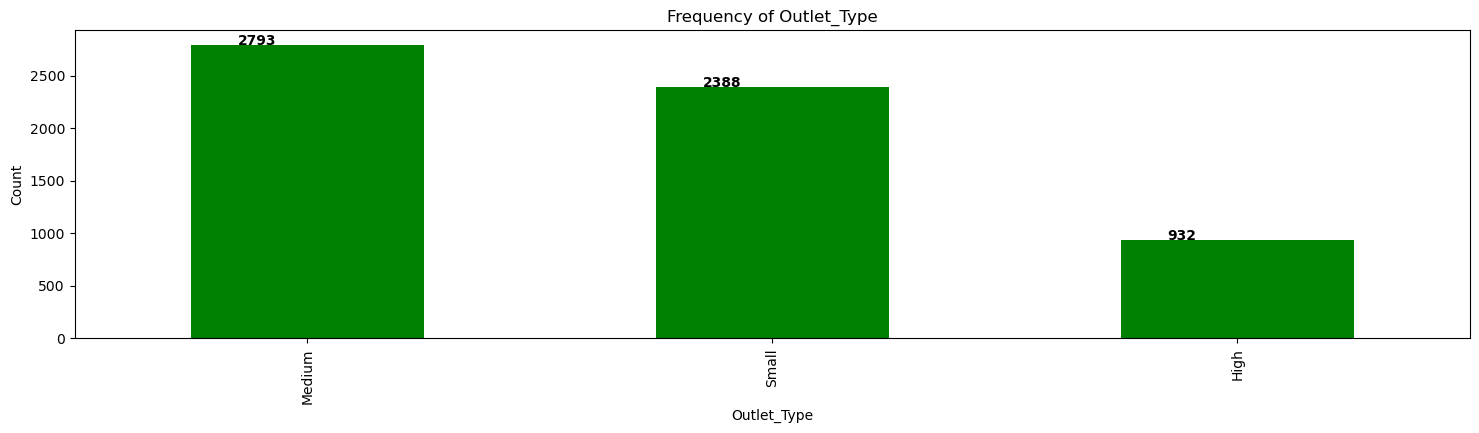

In [20]:
# Plotting the Graph for Categorical values
fig = plt.figure(figsize = (18,4))
count = df['Outlet_Size'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Outlet_Type")
plt.ylabel('Count')
plt.title('Frequency of Outlet_Type')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

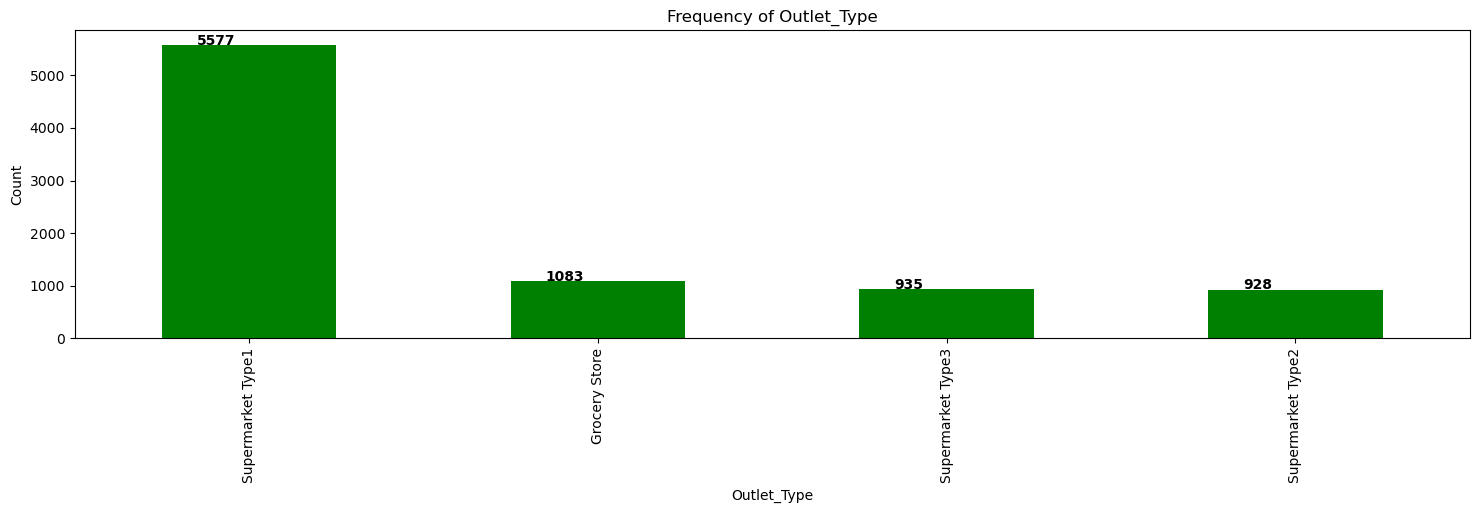

In [22]:
# Plotting the ar Graph for Categorical values
fig = plt.figure(figsize = (18,4))
count = df['Outlet_Type'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Outlet_Type")
plt.ylabel('Count')
plt.title('Frequency of Outlet_Type')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

## Bivariate Analysis through Scatter Plot

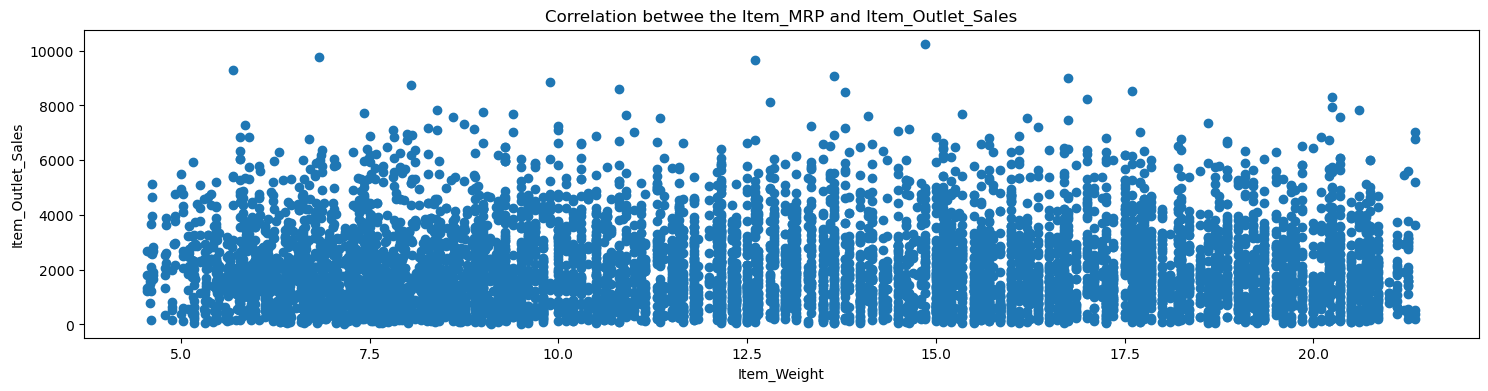

In [23]:
# Target Variables Vs. Independent Numerical Variables
# Plotting the Scatter Plot
fig = plt.figure(figsize = (18,4))
x = df['Item_Weight']
y = df['Item_Outlet_Sales']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
plt.show()

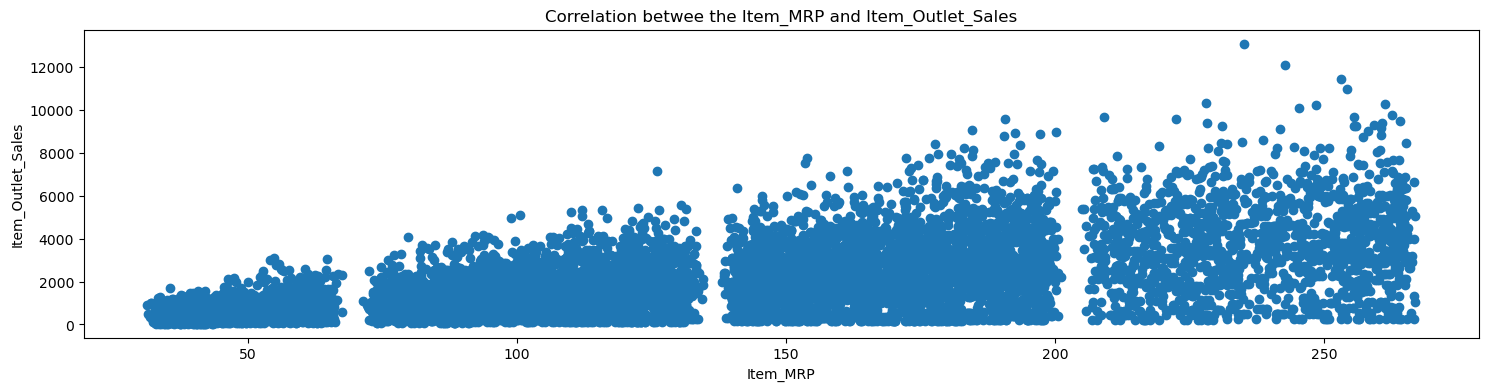

In [24]:
# Target Variables Vs. Independent Numerical Variables
# Plotting the Scatter Plot
fig = plt.figure(figsize = (18,4))
x = df['Item_MRP']
y = df['Item_Outlet_Sales']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
plt.show()

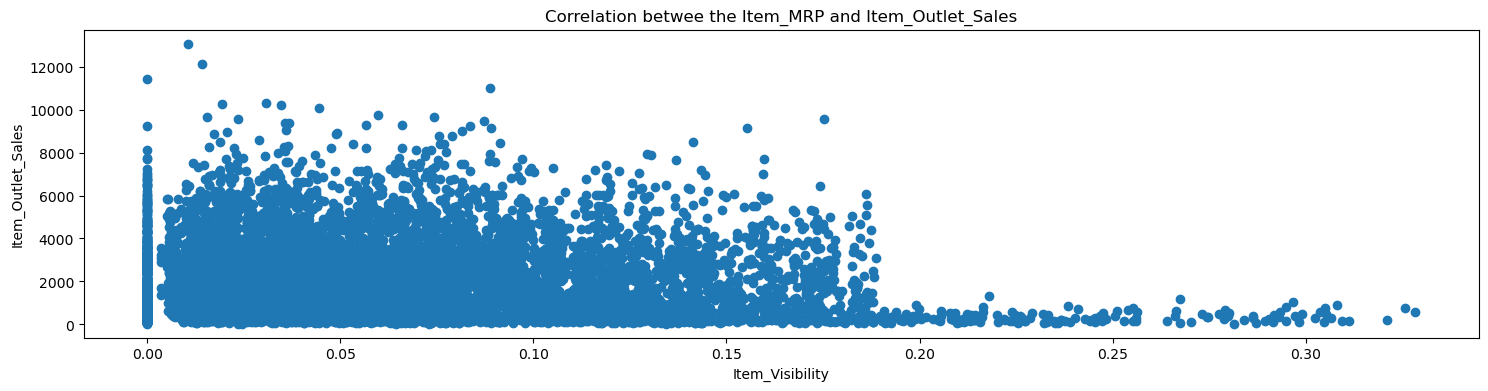

In [25]:
# Target Variables Vs. Independent Numerical Variables
# Plotting the Scatter Plot
fig = plt.figure(figsize = (18,4))
x = df['Item_Visibility']
y = df['Item_Outlet_Sales']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
plt.show()

## Missing Value Treatment

In [26]:
# Let's check how many column in whole dataframe contain the "0" values
num_zeros = (df == 0).sum()
num_zeros

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [27]:
# # Above we can see that there is only one column that contain 0 values that are 526 values in total
# # I am going to remove as there are only 526 values hence it will not affect our data
df.drop(df[df['Item_Visibility'] == 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7997 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7997 non-null   object 
 1   Item_Weight                6624 non-null   float64
 2   Item_Fat_Content           7997 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  7997 non-null   object 
 5   Item_MRP                   7997 non-null   float64
 6   Outlet_Identifier          7997 non-null   object 
 7   Outlet_Establishment_Year  7997 non-null   int64  
 8   Outlet_Size                5731 non-null   object 
 9   Outlet_Location_Type       7997 non-null   object 
 10  Outlet_Type                7997 non-null   object 
 11  Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 812.2+ KB


In [28]:
# Let's confirm the column again
zero_col = (df['Item_Visibility'] == 0).sum()
zero_col

0

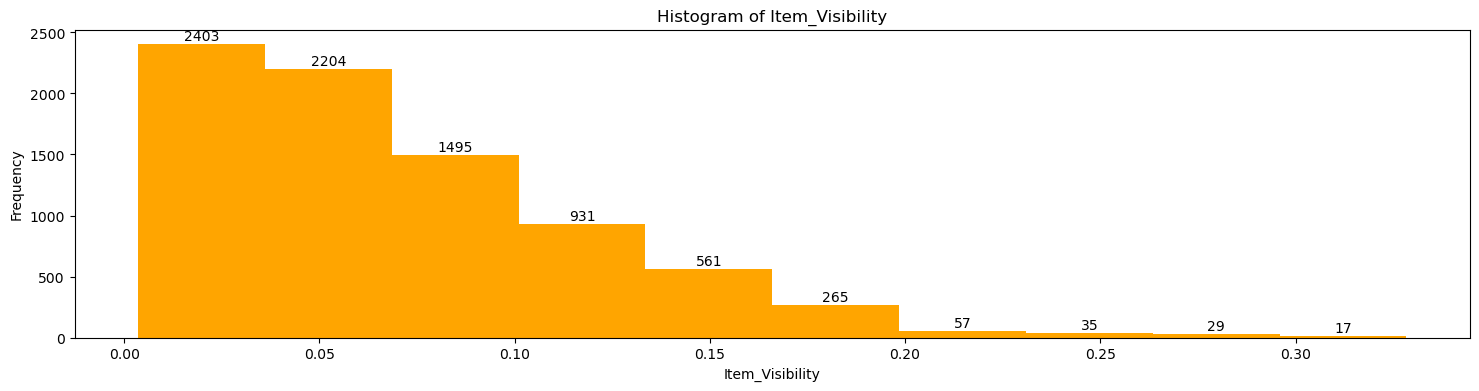

In [29]:
# Plotting the graph for Dependant variable or for Target variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Visibility"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Visibility")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Visibility")
plt.show()

In [30]:
# filling missing values in Item_Weight using the means for each Item_Identifier
# Grouping the data by Item_Identifier and calculating the mean of Item_Weight
item_weight_mean = df.groupby('Item_Identifier')['Item_Weight'].mean()

# Using lambda function 
df['Item_Weight'] = df.apply(lambda x: item_weight_mean[x['Item_Identifier']] if pd.isnull(x['Item_Weight']) else x['Item_Weight'], axis=1)

In [31]:
# Let's cross check either the missing columns have got filled with correct values
selected_rows = df[df['Item_Identifier'].isin(['FDP10', 'FDC14'])]
print(selected_rows[['Item_Identifier', 'Item_Weight']])

     Item_Identifier  Item_Weight
7              FDP10         19.0
29             FDC14         14.5
585            FDP10         19.0
2623           FDP10         19.0
3382           FDP10         19.0
3609           FDC14         14.5
4297           FDC14         14.5
4585           FDP10         19.0
6087           FDP10         19.0
6257           FDC14         14.5
6346           FDC14         14.5
6478           FDC14         14.5
7031           FDC14         14.5
7883           FDP10         19.0


In [33]:
mean_value = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_value, inplace=True)

In [34]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2266
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
# Filling the missing values in Outlet_Size column with mose repeated values

# extract the 'Outlet_Size' column as a numpy array with missing values replaced by NaN
X = df[['Outlet_Size']].values
X[X == None] = np.nan

# create an instance of SimpleImputer with 'most_frequent' strategy for categorical imputation
imputer = SimpleImputer(strategy='most_frequent')

# fit and transform the imputer to fill missing values in the dataset
df['Outlet_Size'] = imputer.fit_transform(X)

In [36]:
# Let's confirm
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outliers Detection and Removal

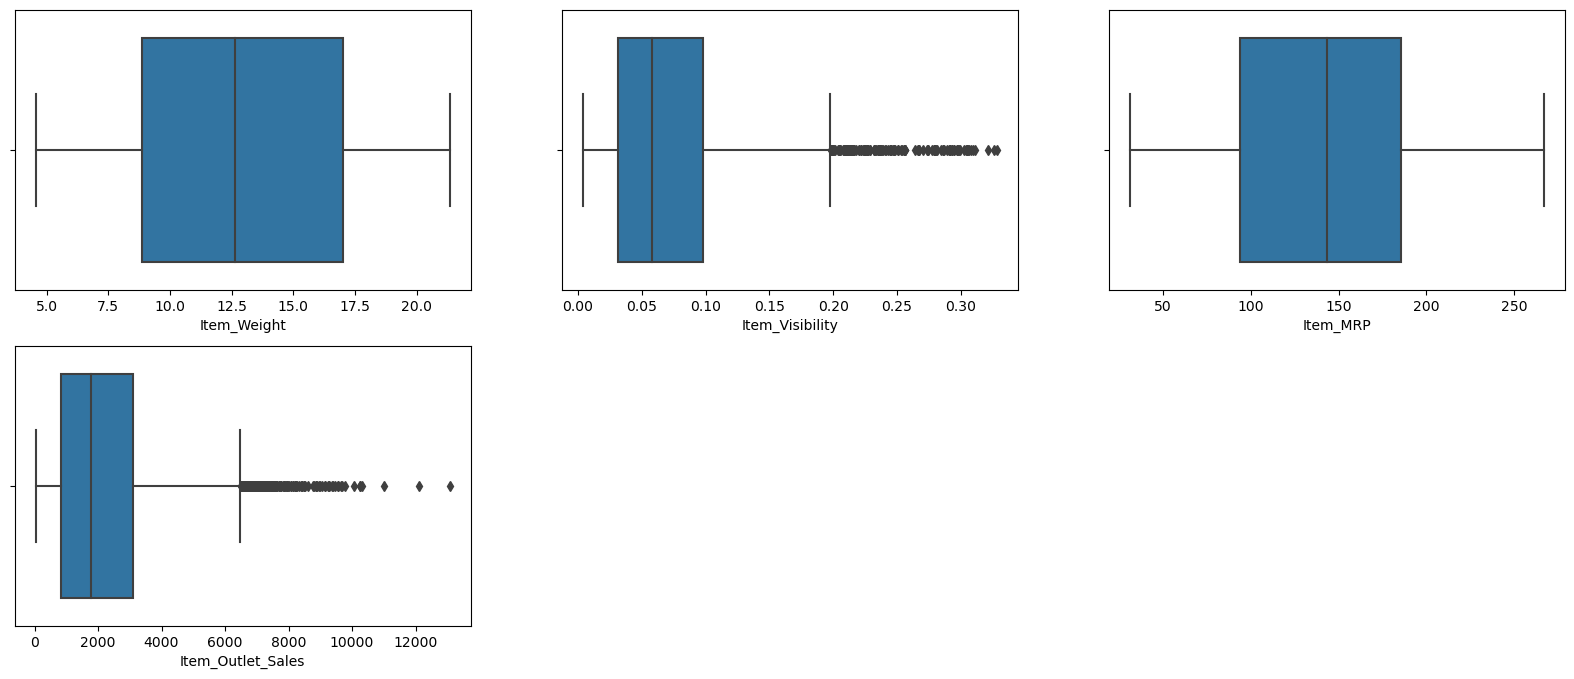

In [37]:
plt.figure(figsize = (20,8))
plt.subplot(2,3,1)
sns.boxplot(df['Item_Weight'])
plt.subplot(2,3,2)
sns.boxplot(df['Item_Visibility'])
plt.subplot(2,3,3)
sns.boxplot(df['Item_MRP'])
plt.subplot(2,3,4)
sns.boxplot(df['Item_Outlet_Sales']);

In [38]:
# Removing outliers in Item_Visibility and Item_Outlet_Sales columns
import numpy as np

def remove_outlier (col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range,upper_range

lowincome,uppincome=remove_outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>uppincome,uppincome,df['Item_Visibility'])

In [39]:
# Item_Outlet_Sales
lowincome,uppincome=remove_outlier(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']=np.where(df['Item_Outlet_Sales']>uppincome,uppincome,df['Item_Outlet_Sales'])

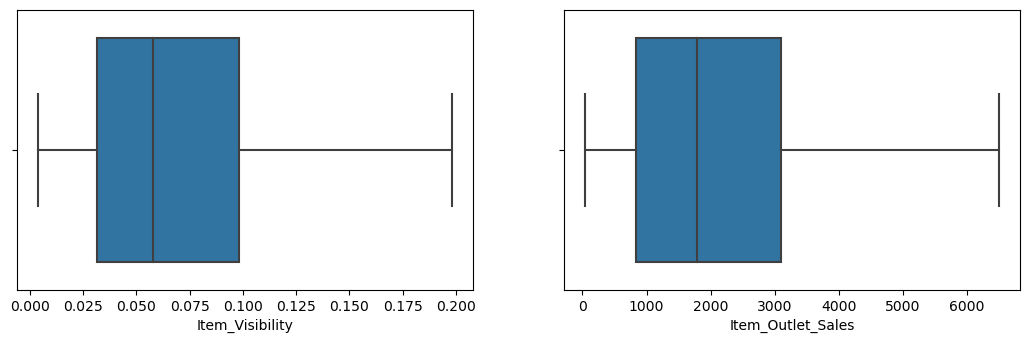

In [40]:
plt.figure(figsize = (20,8))
plt.subplot(2,3,1)
sns.boxplot(df['Item_Visibility'])
plt.subplot(2,3,2)
sns.boxplot(df['Item_Outlet_Sales']);

In [41]:
# In Item_Type column values corresponding to the Item_Fat_Content are not appliacble in 'Household', 'Others' and 'Health and Hygiene'
# therefore replacing this with 'Not Applicable'

df.loc[df['Item_Type'] == 'Others', 'Item_Fat_Content'], df.loc[df['Item_Type'] == 'Household', 'Item_Fat_Content'], \
df.loc[df['Item_Type'] == 'Health and Hygiene', 'Item_Fat_Content'] = 'Not Applicable', 'Not Applicable', 'Not Applicable'

In [42]:
# Let's check either the values have been replaced
selected_rows = df[df['Item_Type'].isin(['Household', 'Health and Hygiene'])]
print(selected_rows[['Item_Type', 'Item_Fat_Content']])

               Item_Type Item_Fat_Content
16    Health and Hygiene   Not Applicable
22             Household   Not Applicable
25             Household   Not Applicable
31    Health and Hygiene   Not Applicable
35    Health and Hygiene   Not Applicable
...                  ...              ...
8498           Household   Not Applicable
8499  Health and Hygiene   Not Applicable
8502           Household   Not Applicable
8504           Household   Not Applicable
8520  Health and Hygiene   Not Applicable

[1346 rows x 2 columns]


## Feature Engineering

In [43]:
# create a new column containing the first two characters of 'my_column'
df['Item_Category'] = df['Item_Identifier'].str.slice(stop=2)

# print the resulting dataframe
df['Item_Category'].unique()
df.loc[df['Item_Type'] == 'Others', 'Item_Fat_Content'], df.loc[df['Item_Type'] == 'Household', 'Item_Fat_Content'], \
df.loc[df['Item_Type'] == 'Health and Hygiene', 'Item_Fat_Content'] = 'Not Applicable', 'Not Applicable', 'Not Applicable'

In [44]:
mapping = {'FD': 'Food Items', 'DR': 'Drinks', 'NC': 'Non-Consumbales'}

df['Item_Category'] = df['Item_Category'].replace(mapping)
df['Item_Category'].unique()

array(['Food Items', 'Drinks', 'Non-Consumbales'], dtype=object)

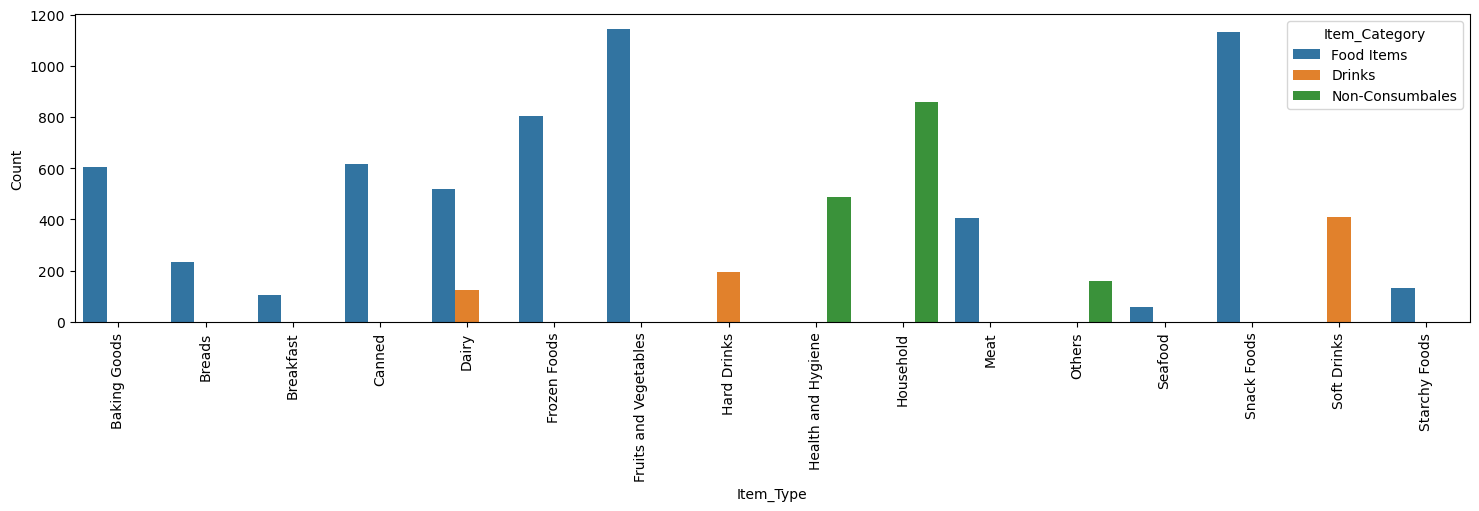

In [45]:
# print(df[['Item_Type', 'Item_Category']])
# Group data by Category1 and Category2
plt.figure(figsize=(18, 4))
grouped = df.groupby(['Item_Type', 'Item_Category']).size().reset_index(name='Count')

# Create grouped bar chart
sns.barplot(x='Item_Type', y='Count', hue='Item_Category', data=grouped)
plt.xticks(rotation=90)
plt.show()

In [46]:
# Deriving a new feature by creating new column Item_MRP_Clusters using if-else statements
df['Item_MRP_Clusters'] = df['Item_MRP'].apply(lambda x: '1st' if x < 69 else ('2nd' if x < 136 else ('3rd' if x < 203 else '4th')))

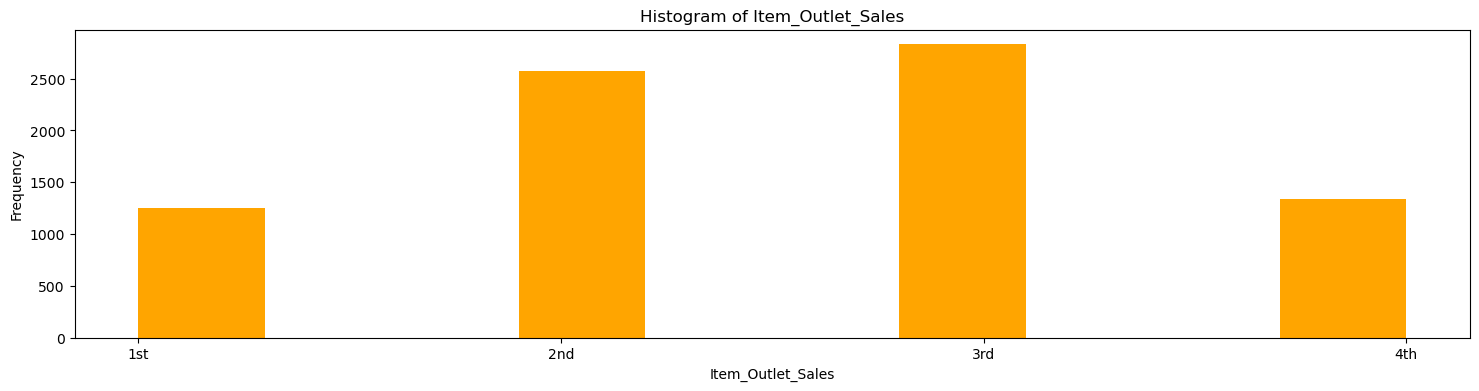

In [47]:
# Sorting the column values 
sorted_values = df['Item_MRP_Clusters'].sort_values()

# Plotting a graph to sow Cluster wise sales
fig = plt.figure(figsize = (18,4))
# create histogram of Item_Weight column
n, bins, patches = plt.hist(sorted_values, color='orange')
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Outlet_Sales")
plt.show()

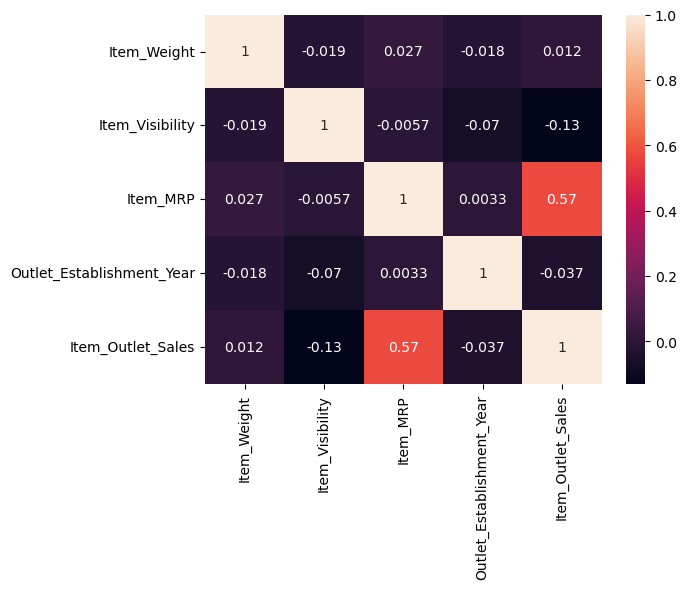

In [48]:
sns.heatmap(df.corr() , annot=True);

In [49]:
# Dropping Unnecessary Columns
df.drop('Item_Identifier' , axis=1 , inplace=True)
df.drop('Outlet_Identifier' , axis=1 , inplace=True)

## Encoding Categorical Variables

### Ordinal Variables Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label encoding for 'Outlet_Size' column
df['Outlet_Size_num'] = le.fit_transform(df['Outlet_Size'])

# Label encoding for 'Outlet_Location_Type' column
df['Outlet_Location_Type_num'] = le.fit_transform(df['Outlet_Location_Type'])

# Label encoding for 'Outlet_Location_Type' column
df['Item_MRP_Clusters_num'] = le.fit_transform(df['Item_MRP_Clusters'])

# Removing categorical variables after label encoding
df = df.drop(['Outlet_Size', 'Outlet_Location_Type', 'Item_MRP_Clusters'], axis=1)

In [51]:
df['Item_Category']

0            Food Items
1                Drinks
2            Food Items
6            Food Items
7            Food Items
             ...       
8518         Food Items
8519         Food Items
8520    Non-Consumbales
8521         Food Items
8522             Drinks
Name: Item_Category, Length: 7997, dtype: object

In [52]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_num,Outlet_Location_Type_num,Item_MRP_Clusters_num
count,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000
mean,12.902691,0.069641,141.181925,1997.826185,2153.799309,1.171314,1.111667,1.533450
std,4.644604,0.047468,62.201545,8.364645,1623.347196,0.600285,0.812706,0.947094
min,4.555000,0.003575,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000
25%,8.850000,0.031403,94.109400,1987.000000,829.586800,1.000000,0.000000,1.000000
50%,12.650000,0.057792,143.215400,1999.000000,1794.331000,1.000000,1.000000,2.000000
75%,17.000000,0.098109,185.758200,2004.000000,3098.633200,2.000000,2.000000,2.000000
max,21.350000,0.198167,266.888400,2009.000000,6502.202800,2.000000,2.000000,3.000000


In [53]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Item_Category']

# create dummy variables for the categorical columns
dummies = pd.get_dummies(df[cat_cols], drop_first=True, prefix=cat_cols)

# concatenate the dummy variables with the original DataFrame
df2 = pd.concat([df.drop(cat_cols, axis=1), dummies], axis=1)

In [54]:
df2.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Size_num', 'Outlet_Location_Type_num', 'Item_MRP_Clusters_num', 'Item_Fat_Content_Not Applicable', 'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Item_Category_Food Items', 'Item_Category_Non-Consumbales'], dtype='object')

In [55]:
df2.isnull().sum()
df2.shape

(7997, 30)

In [57]:
X= df2.drop('Item_Outlet_Sales',axis=1)
y= df2['Item_Outlet_Sales']

In [58]:
# After creating the X and y columns we are now dividing out data set into training and testing.
# Training data is for the training purpose and rest testing part is for the model performance.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [59]:
# Standardize the features in the training and testing sets.
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

### Linear Regression

In [60]:
# Now creating a Liner Regression model, lr_clf = LinearRegression Classifier
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.5697252426211843

## Building All Required Algorithms

In [61]:
train = []
test = []

In [62]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 2],
                'normalize': [True, False]
            }
        },
        'elastic_net': {
            'model': ElasticNet(),
            'params': {
                'alpha': [1, 2],
                'l1_ratio': [0.5],
                'normalize': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100],
                'max_depth': [5, 10],
                'min_samples_split': [2, 5]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.1, 0.01],
                'max_depth': [5, 10],
                'min_child_weight': [1, 5]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=True)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'train_score': gs.cv_results_['mean_train_score'][gs.best_index_],
            'test_score': gs.cv_results_['mean_test_score'][gs.best_index_],
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'train_score', 'test_score', 'best_params'])


In [63]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,train_score,test_score,best_params
0,linear_regression,0.568675,0.579034,0.568675,{'normalize': False}
1,lasso,0.571209,0.578285,0.571209,"{'alpha': 2, 'selection': 'cyclic'}"
2,ridge,0.568853,0.579012,0.568853,"{'alpha': 2, 'normalize': False}"
3,elastic_net,0.382331,0.377220,0.382331,"{'alpha': 1, 'l1_ratio': 0.5, 'normalize': False}"
4,random_forest,0.605089,0.630268,0.605089,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
5,xgboost,0.584503,0.700291,0.584503,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch..."
